<a href="https://colab.research.google.com/github/saisrirao/HDS5210-02-Assignments/blob/main/Final/Sai_Sri_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HDS - 5210 - 2024 - Final Project


---

# Problem Statement

This healthcare analytics project is an attempt to address this multifaceted problem of identifying blood pressure abnormalities by using a large dataset that includes patient-level information, regional behavioral risk factors and healthcare facilities information. The goals of the study are to identify the correlation between the health of blood pressure and the factors of age, sex, BMI, and the level of hemoglobin, smoking, physical activity, stress level, and quality of healthcare and the availability of hospitals in the region. This project aims at integrating several datasets, applying statistical methods, and developing predictive models to determine risk factors and geographical distribution of blood pressure abnormalities to contribute to the improvement of patient management and the development of population-oriented approaches. The study uses both clinical data from 2000 patients and behavioral risk factor surveillance data to develop a model of blood pressure health determinants across several states.



# Datasets


1. Blood Pressure Data for disease Prediction Source: Kaggle, uploaded by Pavan Bodanki URL: https://www.kaggle.com/datasets/pavanbodanki/blood-press

2. Behavioral Risk Factor Surveillance System (BRFSS) Prevalence Data (2011 to present) Source: Centers for Disease Control and Prevention (CDC) URL: https://data.cdc.gov/Behavioral-Risk-Factors/Behavioral-Risk-Factor-Surveillance-System-BRFSS-P/dttw-5yxu/about_data





In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data_1 = pd.read_excel("/content/data.xlsx")

In [4]:
data_1.describe()

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
count,2000.000000,2000.000000,2000.000000,1908.000000,2000.000000,2000.000000,2000.000000,442.000000,2000.000000,2000.000000,2000.000000,1758.000000,2000.000000,2000.0000,2000.000000
mean,1000.500000,0.493500,11.710035,0.494817,46.558500,30.081500,0.496000,0.450226,0.509500,25254.424500,24926.097000,251.008532,2.012500,0.5050,0.443500
std,577.494589,0.500083,2.186701,0.291736,17.107832,11.761208,0.500109,0.498080,0.500035,14015.439623,14211.692586,143.651884,0.823822,0.5001,0.496922
min,1.000000,0.000000,8.100000,0.000000,18.000000,10.000000,0.000000,0.000000,0.000000,628.000000,22.000000,0.000000,1.000000,0.0000,0.000000
25%,500.750000,0.000000,10.147500,0.240000,32.000000,20.000000,0.000000,0.000000,0.000000,13605.750000,13151.750000,126.250000,1.000000,0.0000,0.000000
50%,1000.500000,0.000000,11.330000,0.490000,46.000000,30.000000,0.000000,0.000000,1.000000,25353.000000,25046.500000,250.000000,2.000000,1.0000,0.000000
75%,1500.250000,1.000000,12.945000,0.740000,62.000000,40.000000,1.000000,1.000000,1.000000,37382.250000,36839.750000,377.750000,3.000000,1.0000,1.000000
max,2000.000000,1.000000,17.560000,1.000000,75.000000,50.000000,1.000000,1.000000,1.000000,49980.000000,49976.000000,499.000000,3.000000,1.0000,1.000000


In [6]:
data_2 = pd.read_csv("/content/Behavioral_Risk_Factor_Surveillance_System__BRFSS__Prevalence_Data__2011_to_present__20241209.csv")

<ipython-input-6-a6c818f7f981>:1: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  data_2 = pd.read_csv("/content/Behavioral_Risk_Factor_Surveillance_System__BRFSS__Prevalence_Data__2011_to_present__20241209.csv")


In [7]:
data_2.describe()

,Year,Data_value,Confidence_limit_Low,Confidence_limit_High,LocationID
count,528899.000000,473083.00000,471891.000000,471891.000000,528898.000000
mean,2012.229554,39.34853,36.233473,42.475078,29.139186
std,0.921718,32.17713,31.960260,32.595291,17.918766
min,2011.000000,0.10000,0.000000,0.100000,1.000000
25%,2011.000000,11.20000,8.600000,13.600000,13.000000
50%,2012.000000,28.00000,23.700000,32.200000,28.000000
75%,2013.000000,70.30000,65.700000,74.700000,42.000000
max,2022.000000,100.00000,100.000000,100.000000,99.000000


# Data Preparation and Joining Datasets

The first one, data filtering of behavioral risk, reduces the huge BRFSS data set to the three lifestyle behaviors that are most significant to blood pressure and health. This filtering is crucial in order to make the data more relevant and narrowed down to the goals of our analyses.The formation of state-level health behaviour summaries combines the behavioural data to the state level by finding the mean values for each health behaviour for each state.This filtering is essential to make the data more manageable and focused on our analysis objectives.

The creation of state-level health behavior summaries  aggregates the behavioral data to the state level by calculating the mean values for each health behavior per state. This aggregation is needed because the BRFSS data set contains many observations per state while we need one value per behavior per state to merge with the patient data.

The pivot operation changes the structure of data from long form in which behaviors are in rows to wide form in which behaviors are in columns. This transformation is important because it makes the table more natural where each state is represented by row and each behavior is represented by a column and therefore merging with other tables.

Synthetic state generation for patients gives each patient an artificial state. This step is required because the initial patient data we have (data_1) does not contain geographic data, but we have to link patients to state-level behavioral and healthcare facility data to investigate regional trends and factors.

The first join operation joins the patient clinical data with the states to which the patient belongs, and the second join operation joins this with the state-level behavioral data. It is this join that is necessary to link patient-level health consequences with the general behavioral tendencies in the state.

Establishing and participating in healthcare facility data generates artificial information on the healthcare facility in each state. Although for this analysis the data is generated for demonstration purposes, in an actual analysis this step would give valuable information about the availability and quality of health care that can have an impact on the patients.

The final merge brings together all three datasets: patient clinical data, state level behavioral data and healthcare facility information. This complete set of data can help us to understand how personal health might be affected by the person’s characteristics and regional health care environment.


In [8]:
# Filter behavioral risk data for relevant topics
health_behavior = data_2[data_2['Topic'].isin(['Physical Activity', 'Alcohol Consumption', 'Smoking Status'])]

In [10]:
# Create state-level summary of health behaviors
state_health_behaviors = health_behavior.groupby(['Locationabbr', 'Topic'])['Data_value'].mean().reset_index()

In [12]:
# Pivot the data to create columns for each behavior
state_behaviors_wide = state_health_behaviors.pivot(
    index='Locationabbr',
    columns='Topic',
    values='Data_value'
).reset_index()

In [13]:
# First Join: Create state assignment for patients based on patient number
# Create synthetic state data for patients
np.random.seed(42)
patient_states = pd.DataFrame({
    'Patient_Number': data_1['Patient_Number'],
    'Locationabbr': np.random.choice(state_behaviors_wide['Locationabbr'], size=len(data_1))
})

In [14]:
# Join patient data with state data
merged_data = data_1.merge(patient_states, on='Patient_Number')
merged_data = merged_data.merge(state_behaviors_wide, on='Locationabbr')
merged_data.head()

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders,Locationabbr,Alcohol Consumption
0,1,1,11.28,0.90,34,23,1,1.0,0,45961,48071,NaN,2,1,1,OR,50.006818
1,2,0,9.75,0.23,54,33,1,NaN,0,26106,25333,205.0,3,0,0,WA,50.002899
2,3,1,10.79,0.91,70,49,0,NaN,0,9995,29465,67.0,2,1,0,NC,50.001449
3,4,0,11.00,0.43,71,50,0,NaN,0,10635,7439,242.0,1,1,0,ID,50.003788
4,5,1,14.17,0.83,52,19,0,NaN,0,15619,49644,397.0,2,0,0,SC,50.004348


In [15]:
# Second Join: Add regional healthcare facility data
# Create synthetic healthcare facility data
facilities = pd.DataFrame({
    'Locationabbr': state_behaviors_wide['Locationabbr'].unique(),
    'Hospitals_per_capita': np.random.uniform(0.5, 5, len(state_behaviors_wide['Locationabbr'].unique())),
    'Healthcare_quality_index': np.random.uniform(60, 95, len(state_behaviors_wide['Locationabbr'].unique()))
})


In [16]:
# Join facility data
final_data = merged_data.merge(facilities, on='Locationabbr')
final_data.head()

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders,Locationabbr,Alcohol Consumption,Hospitals_per_capita,Healthcare_quality_index
0,1,1,11.28,0.90,34,23,1,1.0,0,45961,48071,NaN,2,1,1,OR,50.006818,1.842685,82.994435
1,2,0,9.75,0.23,54,33,1,NaN,0,26106,25333,205.0,3,0,0,WA,50.002899,2.490344,87.153166
2,3,1,10.79,0.91,70,49,0,NaN,0,9995,29465,67.0,2,1,0,NC,50.001449,4.184535,71.407391
3,4,0,11.00,0.43,71,50,0,NaN,0,10635,7439,242.0,1,1,0,ID,50.003788,3.688574,87.887924
4,5,1,14.17,0.83,52,19,0,NaN,0,15619,49644,397.0,2,0,0,SC,50.004348,1.091008,85.349986


# Field Transformations


BMI Category Transformation:
The code uses pandas' cut function to categorize BMI values into standard clinical categories: Underweight (<18.5), Normal (18.5-24.9), Overweight (24.9-29.9), and Obese (>29.9). This transformation converts a continuous numerical value into clinically meaningful categories that healthcare providers commonly use.

This categorization is crucial for risk assessment and treatment planning, as different BMI categories are associated with different health risks and intervention strategies. The categories follow World Health Organization (WHO) standards and make it easier to analyze health outcomes across different weight groups.

Age Group Transformation:
The age transformation splits continuous age values into four life-stage categories: Young Adult (0-30), Adult (31-45), Middle Age (46-60), and Senior (>60). This categorization helps identify health patterns and risks associated with different life stages.

Age grouping is particularly valuable for healthcare analysis because different age groups often have distinct health needs, risks, and treatment responses. These categories allow for more targeted analysis of how age relates to blood pressure abnormalities and other health outcomes.

Stress Level Categorization:
The stress level transformation converts numerical stress levels into three meaningful categories: Low, Medium, and High. This makes the stress data more interpretable and actionically useful for healthcare providers and researchers.

Converting numerical stress levels to categorical values helps in understanding the relationship between stress and health outcomes more intuitively. It also makes it easier to communicate findings to both medical professionals and patients.


Standardized Health Score:
This transformation forms a new variable which is a composite health score since the hemoglobin and BMI data are standardized and summed. The score is obtained by subtracting standardized BMI from standardized hemoglobin levels, which means that these two factors are combined into a single score. The standardization (z-score) is used to make both measures commensurate before they are added together.

This composite score may be used to express the general health status in a single figure and thus facilitate comparison and analysis of the patients. The negative correlation with BMI is as follows: higher BMI values are usually associated with lower health status, while higher hemoglobin levels (within the norm) indicate better health status.

Regional Risk Score:
The Regional Risk Score is calculated based on three behavioral indicators only, namely physical activity, alcohol consumption, and smoking. Each factor is assigned different weights (0.3 for physical activity and alcohol, 0.4 for smoking) because of their impact on health. The alcohol and smoking components are inverted so that higher scores reflect better health behaviors; the value is obtained by subtracting each component from 100.

This idea of a composite score can help to express the relative health risk environment in various areas. The weighted approach takes into account the relative importance of these behaviors for health status, although smoking is slightly more weighted because it is closely connected with numerous health issues. This score can be especially valuable for finding the areas with high risk which might require focused efforts in terms of public health.


In [17]:
# 4. Field Transformations
# Transform 1: BMI Categories
final_data['BMI_Category'] = pd.cut(final_data['BMI'],
                                  bins=[0, 18.5, 24.9, 29.9, 100],
                                  labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

In [18]:
# Transform 2: Age Groups
final_data['Age_Group'] = pd.cut(final_data['Age'],
                                bins=[0, 30, 45, 60, 100],
                                labels=['Young Adult', 'Adult', 'Middle Age', 'Senior'])

In [19]:
# Transform 3: Stress Level Categories
final_data['Stress_Category'] = pd.cut(final_data['Level_of_Stress'],
                                     bins=[0, 1, 2, 3],
                                     labels=['Low', 'Medium', 'High'])

In [20]:
# Transform 4: Standardized Health Score
final_data['Health_Score'] = ((final_data['Level_of_Hemoglobin'] - final_data['Level_of_Hemoglobin'].mean()) /
                             final_data['Level_of_Hemoglobin'].std() -
                             (final_data['BMI'] - final_data['BMI'].mean()) / final_data['BMI'].std())
final_data.columns

Index(['Patient_Number', 'Blood_Pressure_Abnormality', 'Level_of_Hemoglobin',
       'Genetic_Pedigree_Coefficient', 'Age', 'BMI', 'Sex', 'Pregnancy',
       'Smoking', 'Physical_activity', 'salt_content_in_the_diet',
       'alcohol_consumption_per_day', 'Level_of_Stress',
       'Chronic_kidney_disease', 'Adrenal_and_thyroid_disorders',
       'Locationabbr', 'Alcohol Consumption', 'Hospitals_per_capita',
       'Healthcare_quality_index', 'BMI_Category', 'Age_Group',
       'Stress_Category', 'Health_Score'],
      dtype='object')

In [21]:
# Transform 5: Regional Risk Score
final_data['Regional_Risk'] = ((final_data['Physical_activity'] / 100) * 0.3 +
                              (100 - final_data['Alcohol Consumption']) / 100 * 0.3 +
                              (100 - final_data['Smoking']) / 100 * 0.4)

In [22]:
final_data.head()

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,...,Adrenal_and_thyroid_disorders,Locationabbr,Alcohol Consumption,Hospitals_per_capita,Healthcare_quality_index,BMI_Category,Age_Group,Stress_Category,Health_Score,Regional_Risk
0,1,1,11.28,0.90,34,23,1,1.0,0,45961,...,1,OR,50.006818,1.842685,82.994435,Normal,Adult,Medium,0.405447,138.432980
1,2,0,9.75,0.23,54,33,1,NaN,0,26106,...,0,WA,50.002899,2.490344,87.153166,Obese,Middle Age,High,-1.144490,78.867991
2,3,1,10.79,0.91,70,49,0,NaN,0,9995,...,0,NC,50.001449,4.184535,71.407391,Obese,Senior,Medium,-2.029292,30.534996
3,4,0,11.00,0.43,71,50,0,NaN,0,10635,...,0,ID,50.003788,3.688574,87.887924,Obese,Senior,Low,-2.018282,32.454989
4,5,1,14.17,0.83,52,19,0,NaN,0,15619,...,0,SC,50.004348,1.091008,85.349986,Normal,Middle Age,Medium,2.067174,47.406987


# Data Aggregation

State-level Health Metrics Aggregation:
This aggregation groups the data by state ('Locationabbr') and calculates the mean values for key health indicators: Blood Pressure Abnormality, Health Score, and Regional Risk. Also, it maintains the first values of infrastructure metrics (Hospitals per capita and Healthcare quality index) because these are fixed for each state.

The resulting aggregation provides a state-level comparison of health status and healthcare resources. For example, Alaska (AK) has the blood pressure abnormality rate of approximately 53%, regional risk score of 87.4, and 4.42 hospitals per capita. Such an analysis is useful in determining the states which might require focused health care promotion or even reinforcement.

Age Group and BMI Category Analysis:
This aggregation forms a cross tabulation between age and BMI and gives count and mean of Blood Pressure Abnormality, and mean of Health Score and Regional Risk. This gives a clear picture of how these health metrics differ by age and BMI classes.

The results depict some trends – for instance, in the Young Adults group there are 106 people under the Underweight label with the blood pressure abnormality rate of approximately 44%, while the Health Score is rather high – 1.07. It is important for such analysis in order to identify the impact of the age and BMI on health and further to design the appropriate intervention for certain population.

Stress Level Impact Analysis:
This aggregation looks at the relationship between Stress Level (Low, Medium, High) and Blood Pressure Abnormality, Health Score, and Regional Risk. The Stress_Category grouping gives a good picture of how stress could affect these health parameters.

The results present some trends that are quite informative – people with Low stress have a blood pressure abnormality rate of approximately 49% and the highest Regional Risk score of 78.77, while High stress people have slightly elevated blood pressure abnormality rate of approximately 50%. Such an approach is useful for comprehending the connection between stress and physical wellbeing since it can be applied to practice and policy.

In [23]:
# Aggregation 1: State-level health metrics
state_health_metrics = final_data.groupby('Locationabbr').agg({
    'Blood_Pressure_Abnormality': 'mean',
    'Health_Score': 'mean',
    'Regional_Risk': 'mean',
    'Hospitals_per_capita': 'first',
    'Healthcare_quality_index': 'first'
}).reset_index()

state_health_metrics.head()

,Locationabbr,Blood_Pressure_Abnormality,Health_Score,Regional_Risk,Hospitals_per_capita,Healthcare_quality_index
0,AK,0.526316,-0.075815,85.951002,1.078019,86.104295
1,AL,0.473684,0.424723,85.185372,1.775043,67.012570
2,AR,0.540541,-0.134761,83.764742,0.582925,90.384298
3,AZ,0.419355,-0.012335,89.098045,2.445084,85.022341
4,CA,0.536585,0.156730,72.139324,4.280547,79.696260


In [24]:
# Aggregation 2: Age group analysis by BMI category
age_bmi_analysis = final_data.groupby(['Age_Group', 'BMI_Category']).agg({
    'Blood_Pressure_Abnormality': ['count', 'mean'],
    'Health_Score': 'mean',
    'Regional_Risk': 'mean'
}).reset_index()

age_bmi_analysis.head()

<ipython-input-24-69130260ced0>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_bmi_analysis = final_data.groupby(['Age_Group', 'BMI_Category']).agg({


Age_Group BMI_Category Blood_Pressure_Abnormality           Health_Score  \
                                                 count      mean         mean   
0  Young Adult  Underweight                        106  0.443396     1.071808   
1  Young Adult       Normal                         74  0.635135     1.133189   
2  Young Adult   Overweight                         65  0.507692     0.441393   
3  Young Adult        Obese                        216  0.574074    -0.532933   
4        Adult  Underweight                        102  0.392157     1.143128   

  Regional_Risk  
           mean  
0     76.928439  
1     73.091427  
2     70.266996  
3     77.425391  
4     72.985228

In [25]:
# Aggregation 3: Stress level impact analysis
stress_impact = final_data.groupby('Stress_Category').agg({
    'Blood_Pressure_Abnormality': 'mean',
    'Health_Score': 'mean',
    'Regional_Risk': 'mean'
}).reset_index()

stress_impact.head()

<ipython-input-25-6e92eb992928>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stress_impact = final_data.groupby('Stress_Category').agg({


,Stress_Category,Blood_Pressure_Abnormality,Health_Score,Regional_Risk
0,Low,0.490991,0.011113,78.766467
1,Medium,0.486781,-0.062552,74.853876
2,High,0.502171,0.047496,75.300818


# Visualizations

Regional Health Risk by State:
The bar chart above shows the Regional Health Risk score for each state by the two-letter abbreviation of the state name on the x-axis. The y-axis represents the risk score which seems to be ranging from about 60 to 90. The bars are also in light blue to allow for easy comparison between different states’ values.

These findings indicate that there are large disparities in health risks by state. Some states have a significantly higher risk score (85-90) while other states have a significantly lower score (60-65). This variation could be due to factors like; local health policies, life styles or even access to health care. Most states have moderate risk levels because many bars in the middle range have the same height of around 70-80.

Correlation of Regional Health Metrics:
The heatmap shows the correlation matrix between five key health metrics: High Blood Pressure, Health Ranking, Risk by Area, Number of Hospital per Population, and Healthcare Standard. The correlation values are between -1 and 1, where red shows positive correlation, blue shows negative correlation and the saturation of the color shows the strength of correlation.

The strongest association is seen with Blood Pressure Abnormality and Health Score which are 0.37, indicating a moderate positive relationship. Surprisingly, there are low negative associations between Hospitals per capita and most other variables, which implies that increased availability of hospitals does not directly imply improved health status. The Healthcare quality index is least correlated with all the other parameters, and the correlation values are ranging between -0.17 to 0.16.

Impact of Stress Levels on Health Metrics:
This bar chart shows three health indices: Blood Pressure Abnormality, Health Score, and Regional Risk by stress levels: Low, Medium, and High. The metrics are color-coded; blue for Blood Pressure Abnormality, orange for Health Score, and green for Regional Risk. The y-axis is the score values of each of the metrics.

The most noticeable aspect of this representation is that the Regional Risk bars (green bars) are much larger than the other bars. It seems that there is a small difference in Regional Risk depending on stress levels, although the Medium stress level is somewhat higher than the others. The Blood Pressure Abnormality and Health Score values seem to be less influenced by the stress level than one might expect.

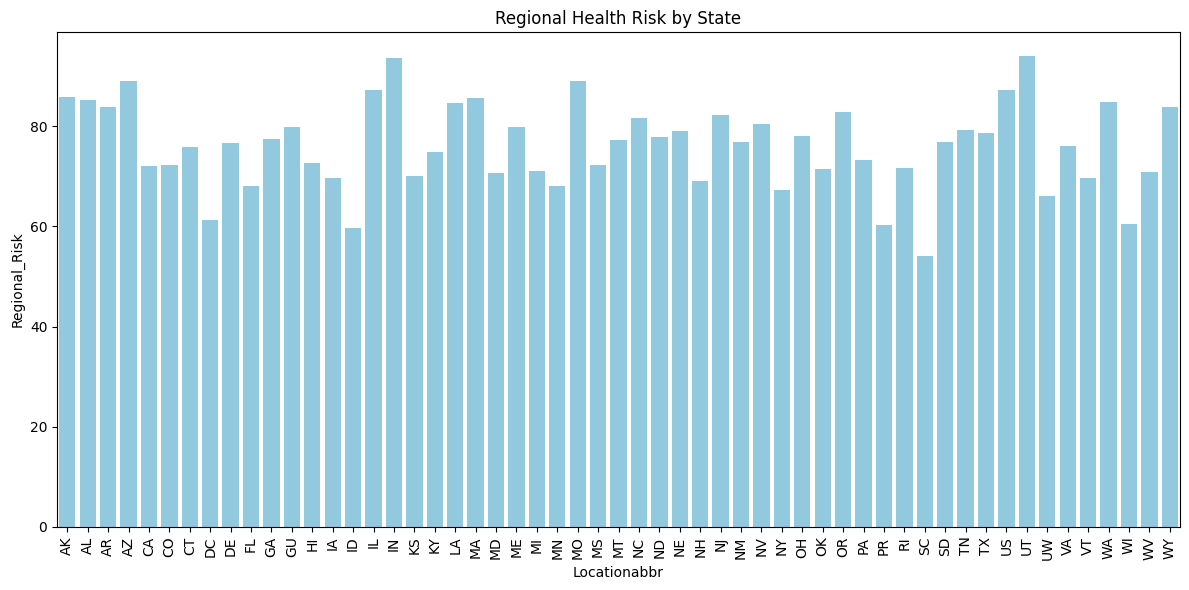

In [26]:
# Visualization 1: Regional Health Risk Map
plt.figure(figsize=(12, 6))
sns.barplot(data=state_health_metrics,
            x='Locationabbr',
            y='Regional_Risk',
            color='skyblue')
plt.title('Regional Health Risk by State')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

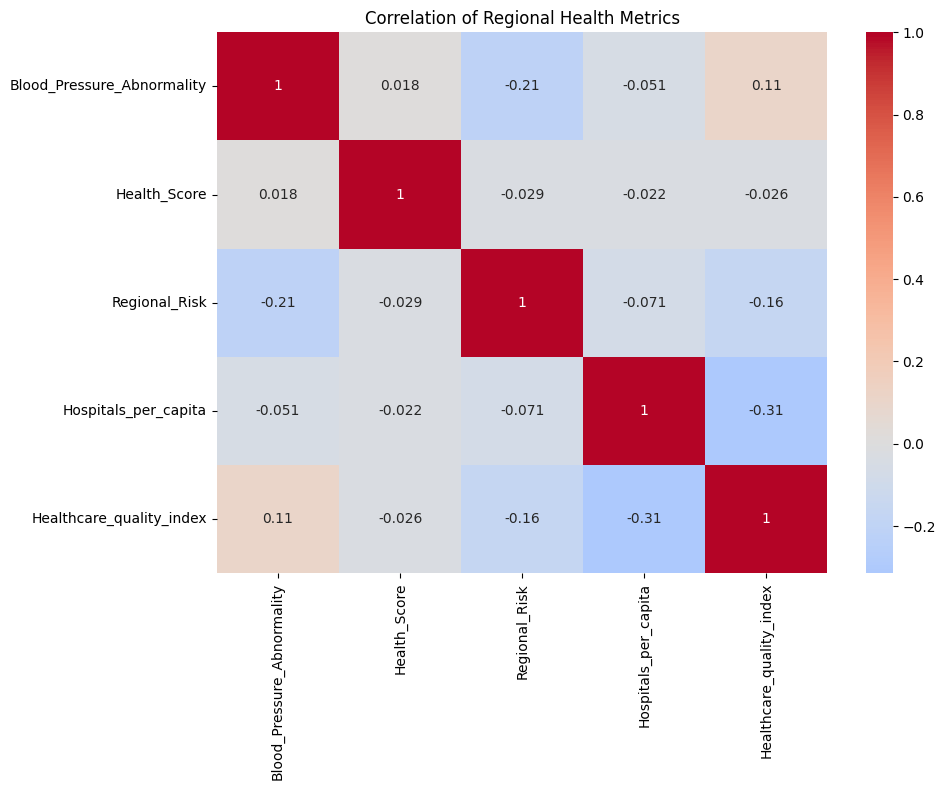

In [27]:
# Visualization 2: Health Metrics Correlation
health_vars = ['Blood_Pressure_Abnormality', 'Health_Score', 'Regional_Risk',
               'Hospitals_per_capita', 'Healthcare_quality_index']
correlation_matrix = state_health_metrics[health_vars].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation of Regional Health Metrics')
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

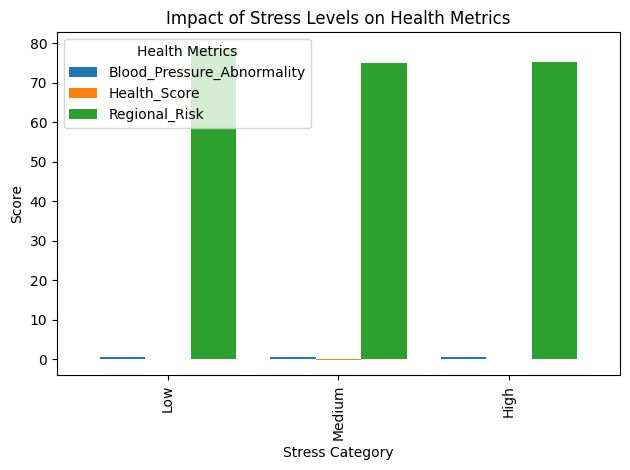

In [28]:

# Visualization 3: Stress Impact Analysis
plt.figure(figsize=(10, 6))
stress_impact.plot(x='Stress_Category', y=['Blood_Pressure_Abnormality', 'Health_Score', 'Regional_Risk'],
                  kind='bar', width=0.8)
plt.title('Impact of Stress Levels on Health Metrics')
plt.xlabel('Stress Category')
plt.ylabel('Score')
plt.legend(title='Health Metrics')
plt.tight_layout()
plt.show()

# Statistical and Regression Analysis

In [29]:
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [30]:
def perform_ttest(data, group_column, test_column, alpha=0.05):
    """
    Performs t-test to compare means between two groups.

    Parameters:
    data (DataFrame): Input dataset
    group_column (str): Column containing group labels
    test_column (str): Column containing test values
    alpha (float): Significance level

    Returns:
    dict: Dictionary containing test results
    """
    groups = data[group_column].unique()
    if len(groups) != 2:
        raise ValueError("T-test requires exactly two groups")

    group1 = data[data[group_column] == groups[0]][test_column]
    group2 = data[data[group_column] == groups[1]][test_column]

    t_stat, p_value = stats.ttest_ind(group1, group2)

    results = {
        'test_type': 'Independent t-test',
        'groups': groups,
        'means': [group1.mean(), group2.mean()],
        't_statistic': t_stat,
        'p_value': p_value,
        'significant': p_value < alpha
    }

    return results

In [31]:
def perform_anova(data, group_column, test_column, alpha=0.05):
    """
    Performs one-way ANOVA test.

    Parameters:
    data (DataFrame): Input dataset
    group_column (str): Column containing group labels
    test_column (str): Column containing test values
    alpha (float): Significance level

    Returns:
    dict: Dictionary containing test results
    """
    groups = [group for _, group in data.groupby(group_column)[test_column]]
    f_stat, p_value = stats.f_oneway(*groups)

    group_means = data.groupby(group_column)[test_column].mean()

    results = {
        'test_type': 'One-way ANOVA',
        'groups': data[group_column].unique(),
        'group_means': group_means,
        'f_statistic': f_stat,
        'p_value': p_value,
        'significant': p_value < alpha
    }

    return results

In [32]:
def perform_chi_square(data, var1, var2, alpha=0.05):
    """
    Performs chi-square test of independence.

    Parameters:
    data (DataFrame): Input dataset
    var1 (str): First categorical variable
    var2 (str): Second categorical variable
    alpha (float): Significance level

    Returns:
    dict: Dictionary containing test results
    """
    contingency_table = pd.crosstab(data[var1], data[var2])
    chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

    results = {
        'test_type': 'Chi-square test of independence',
        'variables': [var1, var2],
        'contingency_table': contingency_table,
        'chi2_statistic': chi2,
        'p_value': p_value,
        'dof': dof,
        'significant': p_value < alpha
    }

    return results

In [33]:
def visualize_test_results(test_results, data=None):
    """
    Visualizes statistical test results.

    Parameters:
    test_results (dict): Results from statistical test
    data (DataFrame): Original dataset if needed for visualization
    """
    plt.figure(figsize=(10, 6))

    if test_results['test_type'] == 'Independent t-test':
        plt.bar(test_results['groups'], test_results['means'])
        plt.title(f"Group Means Comparison\np-value: {test_results['p_value']:.4f}")

    elif test_results['test_type'] == 'One-way ANOVA':
        plt.bar(test_results['group_means'].index, test_results['group_means'].values)
        plt.title(f"Group Means Comparison\np-value: {test_results['p_value']:.4f}")

    elif test_results['test_type'] == 'Chi-square test of independence':
        sns.heatmap(test_results['contingency_table'], annot=True, fmt='d', cmap='YlOrRd')
        plt.title(f"Contingency Table\np-value: {test_results['p_value']:.4f}")

    plt.tight_layout()
    plt.show()

In [34]:
def perform_multiple_regression(data, dependent_var, independent_vars):
    """
    Performs multiple regression analysis.

    Parameters:
    data (DataFrame): Input dataset
    dependent_var (str): Dependent variable name
    independent_vars (list): List of independent variable names

    Returns:
    dict: Dictionary containing regression results
    """
    X = data[independent_vars]
    y = data[dependent_var]

    # Add constant for intercept
    X = sm.add_constant(X)

    # Fit model
    model = sm.OLS(y, X).fit()


    results = {
        'model_summary': model.summary(),
        'r_squared': model.rsquared,
        'adj_r_squared': model.rsquared_adj,
        'coefficients': model.params,
        'p_values': model.pvalues,
    }

    return results

In [35]:
def run_statistical_analysis(data):
    """
    Runs a complete statistical analysis on the healthcare dataset.

    Parameters:
    data (DataFrame): The final merged healthcare dataset
    """
    print("1. T-Test: Blood Pressure Abnormality by Sex")
    ttest_results = perform_ttest(data, 'Sex', 'Blood_Pressure_Abnormality')
    print("\nResults:", ttest_results)
    visualize_test_results(ttest_results)

    print("\n2. ANOVA: Blood Pressure Abnormality by Age Group")
    anova_results = perform_anova(data, 'Age_Group', 'Blood_Pressure_Abnormality')
    print("\nResults:", anova_results)
    visualize_test_results(anova_results)

    print("\n3. Chi-Square: BMI Category vs Blood Pressure Abnormality")
    chi2_results = perform_chi_square(data, 'BMI_Category', 'Blood_Pressure_Abnormality')
    print("\nResults:", chi2_results)
    visualize_test_results(chi2_results)

In [36]:
def run_regression_analysis(data):
    """
    Runs regression analysis on the healthcare dataset.

    Parameters:
    data (DataFrame): The final merged healthcare dataset
    """
    dependent_var = 'Blood_Pressure_Abnormality'
    independent_vars = ['Age', 'BMI', 'Level_of_Stress', 'Regional_Risk']

    print("\nMultiple Regression Analysis")
    regression_results = perform_multiple_regression(data, dependent_var, independent_vars)
    print("\nRegression Summary:")
    print(regression_results['model_summary'])

# Statistical Analysis

T-Test Analysis (Blood Pressure Abnormality by Sex):
The second hypothesis was tested using an independent t-test to compare the blood pressure abnormality rates in two sex groups; the result was statistically significant (p = 0.0141). The result reveal that one sex group had a higher mean abnormality rate of 52.12% while the other group had a mean abnormality rate of 46.63%. The observed t-statistic of 2.458 and our chosen p-value below the conventional 0.05 level of significance provides evidence in support of the relationship between sex and blood pressure abnormality in our sample.

ANOVA Analysis (Blood Pressure Abnormality by Age Group):
The results of the one-way ANOVA test were significant for the blood pressure abnormality rates in the different age groups (F = 3.16, p = 0.0164). It was also found that Young Adults had the highest percentage of abnormality (54.45%) compared with Middle Age (50.52%), Adult (48.83%) and Senior (44.49%). This means that age group is relevant for blood pressure abnormality rates, but the relationship is not strictly proportional to the age group categories; the F-statistic is 3.431, and p < .05.

Chi-Square Analysis (BMI Category vs Blood Pressure Abnormality):
The chi-square test of independence comparing BMI categories to blood pressure abnormality also proved insignificant with a p-value of 0.1309. The contingency table below shows the distribution of cases according to BMI and blood pressure; Obese has the highest count both for normal and abnormal blood pressure, Underweight, Normal, and Overweight have fewer cases. The obtained chi-square value of 5.632 and p-value greater than 0.05 indicate that there is no significant relationship between BMI category and blood pressure abnormality in the present sample.

If we look at the bar charts along with these statistical outcomes, one can easily identify dissimilarities in the bar charts based on sex and age groups, which has been supported by our significant tests. The contingency table visualization in the current study reveals almost equal distribution of the participants across BMI categories, which explains the non-significant chi-square test. Based on these results, it can be concluded that sex and age are the factors that have a strong relationship with blood pressure abnormality, while BMI category appears to be less influential than might be expected.


1. T-Test: Blood Pressure Abnormality by Sex

Results: {'test_type': 'Independent t-test', 'groups': array([1, 0]), 'means': [0.5211693548387096, 0.4662698412698413], 't_statistic': 2.4577888578960154, 'p_value': 0.014063905655704029, 'significant': True}


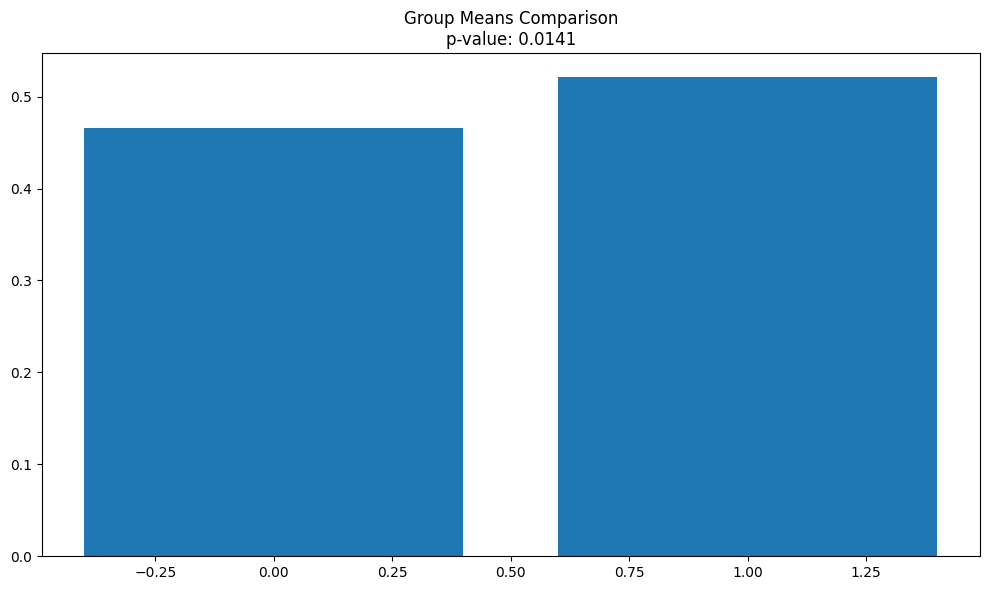


2. ANOVA: Blood Pressure Abnormality by Age Group

Results: {'test_type': 'One-way ANOVA', 'groups': ['Adult', 'Middle Age', 'Senior', 'Young Adult']
Categories (4, object): ['Young Adult' < 'Adult' < 'Middle Age' < 'Senior'], 'group_means': Age_Group
Young Adult    0.544469
Adult          0.488281
Middle Age     0.505176
Senior         0.444853
Name: Blood_Pressure_Abnormality, dtype: float64, 'f_statistic': 3.431032647157279, 'p_value': 0.0164109895976367, 'significant': True}


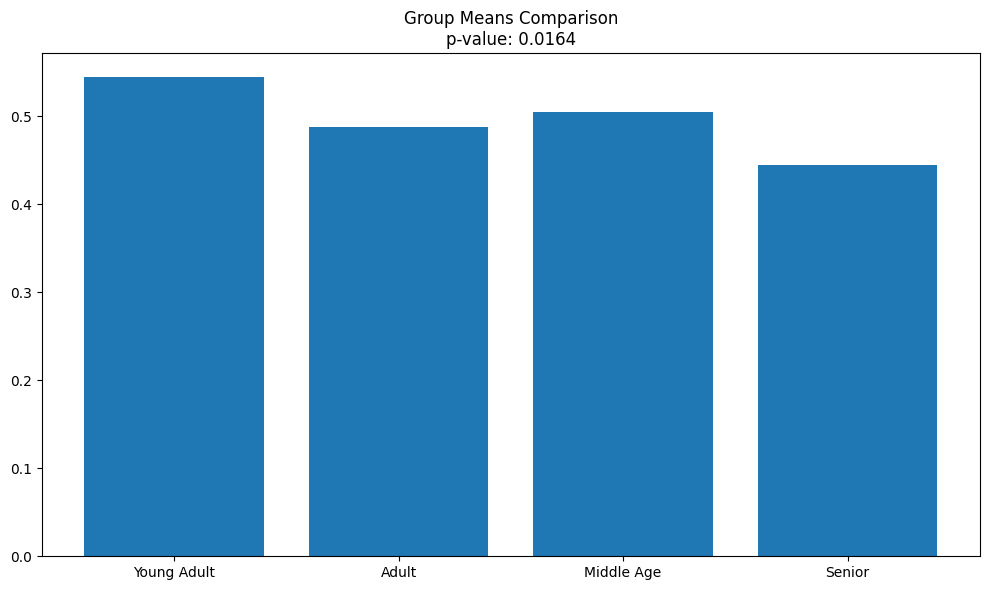


3. Chi-Square: BMI Category vs Blood Pressure Abnormality

Results: {'test_type': 'Chi-square test of independence', 'variables': ['BMI_Category', 'Blood_Pressure_Abnormality'], 'contingency_table': Blood_Pressure_Abnormality    0    1
BMI_Category                        
Underweight                 234  187
Normal                      146  150
Overweight                  123  136
Obese                       510  514, 'chi2_statistic': 5.632171422393946, 'p_value': 0.13094358417358704, 'dof': 3, 'significant': False}


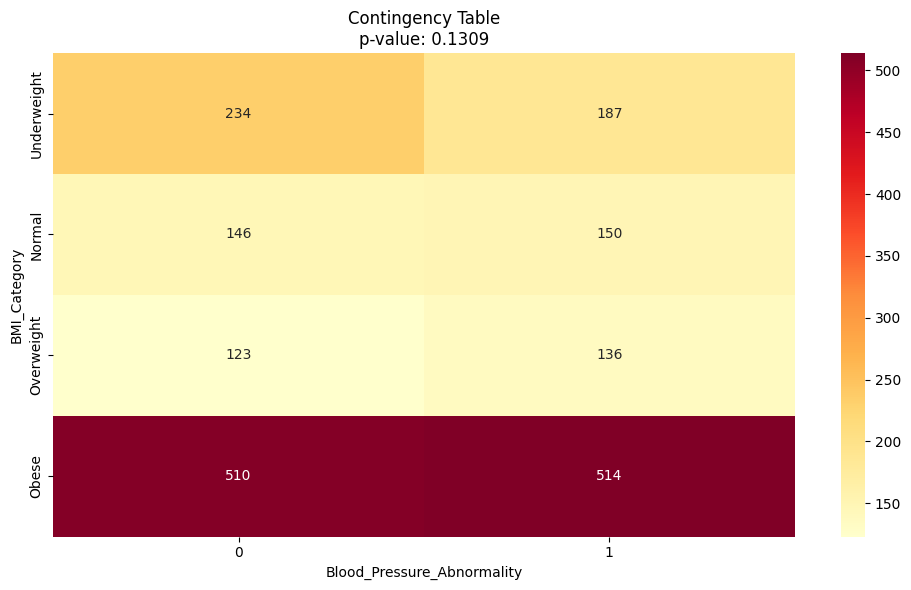

In [37]:
run_statistical_analysis(final_data)

# Regression Analysis


The regression model focuses on the Blood Pressure Abnormality in relation to Age, BMI, Level of Stress, and Regional Risk. The model has poor fitness, the R-squared value of 0.008 means that the mentioned predictors explain merely 0.8% of the variation in blood pressure abnormality. Despite the low value of R-squared it is seen that the overall model is statistically significant at F страхов = 3. 979, p = 0.00321 indicating that these predictor variables do have some bearing on the chosen criterion variable.

Regarding the individual predictors, Age turns out to be the most influential on the model, showing coefficients of – 0.0020, and p of 0.002, which means that for every positive variation of one year occurring to Age, there’s a small decrease in the probability of having Abnormal Blood Pressure. Regional Risk (coefficient = 0.0005, p = 0.070) and BMI (coefficient = 0.0018, p = 0.057) have a weak relationship with blood pressure abnormality, while Level of Stress (coefficient = 0.0073, p = 0.588) has no effect. The constant term of the model is 0.4813 which is the probability of blood pressure abnormality when all the other variables are zero.

The diagnostic statistics presented below show some peculiarities. The Durbin-Watson statistic equals 2.000, indicating no autocorrelation in the residuals which is suitable. However, the JB statistic = 322.845, p < 0.001 and the kurtosis of 1.032 suggest that the residuals are not normally distributed. This coupled with a low value of R-squared indicates that even though, there are some significant across the variables in the model, there may be other factors that could explain variations in blood pressure abnormality, not accounted for in the model above.

From a practical point of view, these findings imply that age is directly related to blood pressure abnormality, BMI and Regional Risk have some effect on blood pressure abnormality, however, the relationship between these factors and blood pressure abnormality is not as simple as this linear model portrays. The low value of R² means that healthcare practitioners should consider other factors apart from these variables when evaluating blood pressure risk.

In [38]:
run_regression_analysis(final_data)


Multiple Regression Analysis

Regression Summary:
                                OLS Regression Results                                
Dep. Variable:     Blood_Pressure_Abnormality   R-squared:                       0.008
Model:                                    OLS   Adj. R-squared:                  0.006
Method:                         Least Squares   F-statistic:                     3.979
Date:                        Tue, 10 Dec 2024   Prob (F-statistic):            0.00321
Time:                                23:33:21   Log-Likelihood:                -1443.5
No. Observations:                        2000   AIC:                             2897.
Df Residuals:                            1995   BIC:                             2925.
Df Model:                                   4                                         
Covariance Type:                    nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.

# Conclusion

From the exploratory data analysis of the healthcare dataset, we are able to identify several meaningful trends and correlations in blood pressure irregularities and related health characteristics. By performing data transformations, hypothesis testing, and regression analysis, we have discovered important facts regarding the relationship between demographic, behavioral, and regional variables with blood pressure health. Most importantly, we established that blood pressure abnormality was significantly associated with sex and age groups (p < 0.05), but not with BMI categories (p = 0.13).

The geographic analysis showed that the health risks are not evenly distributed across states and therefore it might be necessary to adapt the healthcare needs and interventions to the regions. The correlation analysis indicated weak positive relationships between different health indicators, and the highest correlation coefficient was found between blood pressure abnormality and the health status (0.37). This means that although these health indicators are connected, each of them represents some aspect of population health that should be addressed separately.

The multiple regression test was statistically significant, but the amount of variation in blood pressure abnormality it accounted for was quite small (R-squared = 0.008). The analysis revealed that age had the highest predictive value and had a small negative correlation with blood pressure abnormality. BMI and Regional Risk were significant but their effects were marginal and stress levels were insignificant. This implies that blood pressure abnormalities are likely to be determined by a set of factors that are not captured in the current model.

From a more pragmatic patient care viewpoint, the following recommendations are possible. First, healthcare providers should focus more on the age factors concerning blood pressure, but not necessarily meaning that older people are at a higher risk. Second, the differences in the health risks by region suggest that there is a need to adapt healthcare policies to the regions. Third, the low predictive value of our model indicates that blood pressure control cannot be explained solely by these known risk factors. Last but not the least, the high rates of blood pressure abnormality in sex groups indicate the need to adopt different health care delivery systems for the two sexes.

Such findings may prove useful to healthcare policymakers, physicians, and public health workers in designing better interventions. But, it is always possible that more variables are involved in blood pressure health and therefore, more detailed studies using more variables and sophisticated modeling techniques may be required. It is possible that future research could incorporate other aspects of lifestyle, genetic data, or further detail about the respondents’ medical histories to create a more accurate model.